# Assignment Week 13
## Group Assignment (Group 10)

#### 1. Please read the following code, write comments and discuss its purpose. 

```python
import numpy as np
from scipy import fftpack
N = 201
dx = (9 - (-9)) / (N - 1)
x = np.arange(-9, 9+dx, dx)
psi = np.exp(-(x**2)/3)*np.cos(2*x)
dpsi = fftpack.diff(psi, period=N*dx)
```

**Comments**:

In [1]:
import numpy as np
from scipy import fftpack
N = 201  # number of nodes
dx = (9 - (-9)) / (N - 1)  # length of intervals
x = np.arange(-9, 9+dx, dx)  # discrete points in the x space
psi = np.exp(-(x**2)/3)*np.cos(2*x)  # the function to be differentiated
dpsi = fftpack.diff(psi, period=N*dx)  # the derivative of psi

**The purpose** is to obtain the derivative of a function discretely from the discrete form of this function by using the Python package `fftpack.diff`.

#### 2. The Hamiltonian for the quantum harmonic oscillator is given by 

$$
H =\frac{p^2}{2m}+\frac{1}{2}m\omega^2x^2
$$

#### Substituting this into the time-independent Schrödinger equation $H\psi(x) = E\psi(x)$ and solving for the first excited state, we find that this corresponds to the wavefunction
$$
\psi_1(x) =\left(\frac{4\alpha^3}{\pi}\right)^{1/4}e^{-\alpha x^2/2}
$$
#### where $\alpha = m\omega/\hbar$.

#### (1) Using the Riemann sum technique to approximate the Fourier transform, let $\alpha = 1$ and discretise $\psi(x)$ over a reasonable grid size and modify the sample script to numerically calculate the momentum-space wavefunction $\phi(k)$. Remember to choose your domain $−x_\text{max} < x < x_\text{max}$ such that $\psi(\pm x_\text{max}) \approx 0$.

$$
\psi(x) =\left(\frac{4}{\pi}\right)^{1/4}e^{-x^2/2}
$$
$$
\psi(\pm 5)=3.9586e-6 \approx 0
$$
so we choose $ x_\text{max}=5$

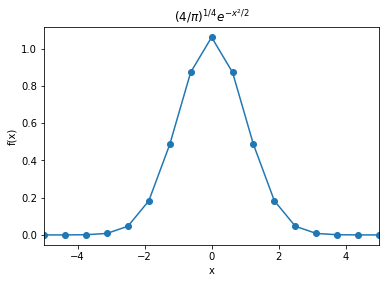

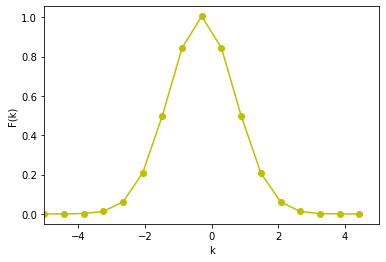

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

N=17
a = (N - 1)/2
halfL = 5
dx = (halfL - (-halfL)) / (N - 1)
# define the x-grid and discretised wavefunction
x = np.arange(-halfL, halfL+dx, dx) # 1D array, x.shape: (N,)

psi = (4/np.pi)**(1/4)*np.exp(-x**2/2)# 1D array, psi.shape: (N,)

# define the k-grid
dk = 2*np.pi / (N*dx)
kmax = np.pi / dx
k = np.arange(-kmax, kmax, dk)  # 1D array, k.shape: (N+1,)
    
# the 2-dimensional Fourier matrix using broadcasting
n = np.arange(N).reshape((-1, 1))   # 2D array, change with rows, n.shape(N,1)
m = np.arange(N).reshape((1, -1))   # 2D array, change with columns, m.shape(1,N)
W = np.exp(-2j*np.pi*(m-a)*(n-a)/N)  # numpy array broarcasting, W is a 2D array, W.shape(N,N)
    
# perform the discretised Fourier algorithm
# psi is indexed by n
psi_dft = psi.reshape(-1, 1)      # 2D array, psi_dft.shape(N,1)
# sum over n axis
phi = np.sum(psi_dft * W, axis=0)*dk/np.sqrt(2*np.pi)
phi = np.abs(phi)

# plot
plt.title('$(4/\pi)^{1/4}e^{-x^2/2}$')
plt.plot(x,psi,'o-')
plt.xlim(-halfL,halfL)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

plt.plot(k[0:len(x)],np.abs(phi),'yo-')
plt.xlim(-kmax, kmax)
plt.xlabel('k')
plt.ylabel('F(k)')
plt.show()

#### (2) How does your result compare against the exact result? Produce an error plot comparing the exact and numerical results over the domain.

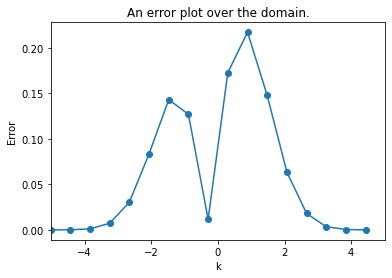

In [3]:
plt.title('An error plot over the domain.')
phi_t = (4/np.pi)**(1/4)*np.exp(-k[0:len(x)]**2/2)
plt.plot(k[0:len(x)], np.abs(np.abs(phi)-phi_t),'o-')
plt.xlim(-kmax, kmax)
plt.xlabel('k')
plt.ylabel('Error')
plt.show()

#### (3) Repeat part (1) for varying grid discretisations $\Delta x$, and plot the resulting maximum absolute error vs $\Delta x$. What do you find? How does the error in this approximation scale with $\Delta x$?

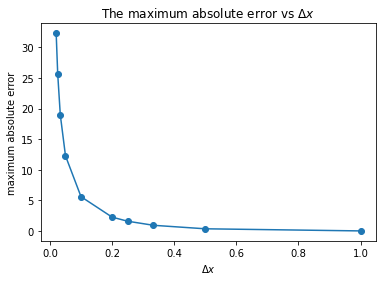

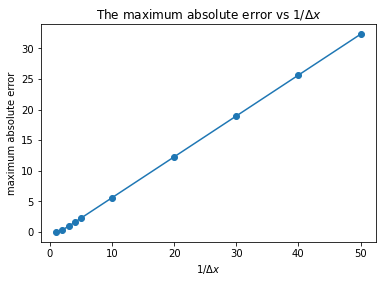

In [4]:
def fourier(N):    
    a = (N - 1)/2
    halfL = 5
    dx = (halfL - (-halfL)) / (N - 1)
    # define the x-grid and discretised wavefunction
    x = np.arange(-halfL, halfL+dx, dx) # 1D array, x.shape: (N,)
    psi = (4/np.pi)**(1/4)*np.exp(-x**2/2)# 1D array, psi.shape: (N,)
    # define the k-grid
    dk = 2*np.pi / (N*dx)
    kmax = np.pi / dx
    k = np.arange(-kmax, kmax, dk)  # 1D array, k.shape: (N+1,)
    
    # the 2-dimensional Fourier matrix using broadcasting
    n = np.arange(N).reshape((-1, 1))   # 2D array, change with rows, n.shape(N,1)
    m = np.arange(N).reshape((1, -1))   # 2D array, change with columns, m.shape(1,N)
    W = np.exp(-2j*np.pi*(m-a)*(n-a)/N)  # numpy array broarcasting, W is a 2D array, W.shape(N,N)
    
    # perform the discretised Fourier algorithm
    # psi is indexed by n
    psi_dft = psi.reshape(-1, 1)      # 2D array, psi_dft.shape(N,1)
    # sum over n axis
    phi = np.sum(psi_dft * W, axis=0)*dk/np.sqrt(2*np.pi)
    phi = np.abs(phi)
    phi_t = (4/np.pi)**(1/4)*np.exp(-k[0:len(x)]**2/2)
    w=(N-1)/2
    #error=max(phi)-(4/np.pi)**(1/4)
    error = max(phi-phi_t)
    return error

N=[11, 21, 31, 41, 51, 101, 201,301,401,501]
dx=np.zeros(len(N))
error=np.zeros(len(N))
for i in range(0,len(N)):
    dx[i]=10/(N[i]-1)
    error[i]=fourier(N[i])
    
plt.title('The maximum absolute error vs $\Delta x$')
plt.plot(dx,error,'o-')
plt.xlabel('$\Delta x$')
plt.ylabel('maximum absolute error')
plt.show()

plt.title('The maximum absolute error vs $1/\Delta x$')
plt.plot(1/dx,error,'o-')
plt.xlabel('$1/\Delta x$')
plt.ylabel('maximum absolute error')
plt.show()

The maximum absolute error is approximately inversely proportional to $\Delta x$, which means that smaller $\Delta x$ produces more accurate result, at the cost of larger $\Delta k$. This accords with the uncertainty principle.

#### 3.

#### (1) Use Fourier differentiation and FFT implementation to calculate the first derivative of $\psi_1(x)$ from problem 1, letting $\alpha = 1$ and using $N = 256$ discretised grid points.

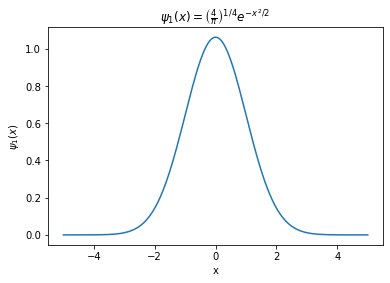

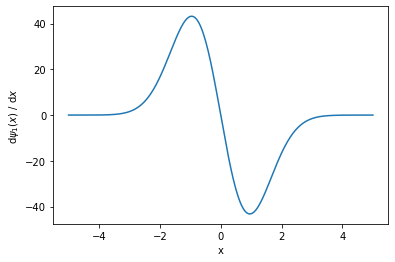

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import fftpack

def FFT2_numpy(f):
    # Compute all 2-point DFTs
    N = f.shape[0]
    W = np.array([[1, 1], [1, -1]])
    F = np.dot(W, f.reshape([2, -1]))
    # number of remaining Cooley-Tukey stages
    stages = int(np.log2(N))-1
    for i in range(stages):
        k = F.shape[0] # size of the DFTs to combine
        n = F.shape[1] # number of DFTs to combine
        Am = F[:, :n//2] # 'even' terms
        Bm = F[:, n//2:] # 'odd' terms
        twiddle = np.exp(-1.j*np.pi*np.arange(k)/k)[:, None]
        F = np.vstack([Am + twiddle*Bm, Am - twiddle*Bm])
    return F.flatten()

def fft_diff(f, N=256):
    # define the properties
    a = (N-1)/2
    dx = (5-(-5))/(N-1)

    # define the x-grid and discretised wavefunction
    x = np.arange(-5, 5+dx, dx)
    psi = f(x)

    # perform the centered-sided FFT
    n = np.arange(N)
    phi = FFT2_numpy(np.exp(2j*np.pi*a*n/N) * psi)
    # one-sided -> centered phase shift
    phi *= np.exp(2j*np.pi*a*(n-a)/N)
    dk = 2*np.pi/(N*dx)
    kmax = np.pi/dx
    k = np.arange(-kmax, kmax, dk)

    dpsi = np.array([dk / np.sqrt(2*np.pi) * np.sum(abs(phi) * 1j * k * np.exp(1j* k * i)) for i in x])
    
    return x, dpsi

psi = lambda x: pow(4 / np.pi, 0.25) * np.exp(-x**2 / 2)
x, dpsi = fft_diff(psi, N=256)

plt.title(r'$\psi_1(x) =\left(\frac{4}{\pi}\right)^{1/4}e^{-x^2/2}$')
plt.plot(x, psi(x))
plt.xlabel('x')
plt.ylabel(r'$\psi_1(x)$')
plt.show()

plt.xlabel('x')
plt.ylabel(r'${\rm d}\psi_1(x)\ /\ {\rm d}x$')
plt.plot(x, dpsi.real)
plt.show()

#### (2) Modify the formula to instead calculate the second derivative. Use this expression to calculate the second derivative of $\psi_1(x)$.

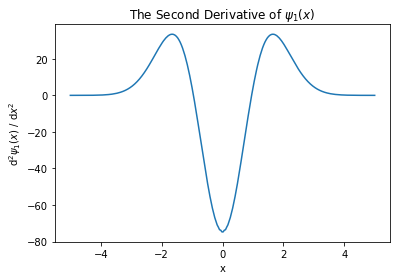

In [6]:
def fft_diff_2(f, N=256):
    # define the properties
    a = (N-1)/2
    dx = (5-(-5))/(N-1)

    # define the x-grid and discretised wavefunction
    x = np.arange(-5, 5+dx, dx)
    psi = f(x)

    # perform the centered-sided FFT
    n = np.arange(N)
    phi = FFT2_numpy(np.exp(2j*np.pi*a*n/N) * psi)
    # one-sided -> centered phase shift
    phi *= np.exp(2j*np.pi*a*(n-a)/N)
    dk = 2*np.pi/(N*dx)
    kmax = np.pi/dx
    k = np.arange(-kmax, kmax, dk)

    ddpsi = np.array([dk / np.sqrt(2*np.pi) * np.sum(-abs(phi) * k**2 * np.exp(1j* k * i)) for i in x])
    
    return x, ddpsi

psi = lambda x: pow(4 / np.pi, 0.25) * np.exp(-x**2 / 2)
x, ddpsi = fft_diff_2(psi, N=256)

plt.title(r'The Second Derivative of $\psi_1(x)$')
plt.xlabel('x')
plt.ylabel(r'${\rm d}^2\psi_1(x)\ /\ {\rm d}x^2$')
plt.plot(x, ddpsi.real)
plt.show()

#### (3) Compare your results to the exact solution to the first derivative $\psi_1(x)$ and the second derivative $\psi_1(x)$. What do you find? Repeat your results for various values of $N$, and plot the maximum error vs $N$.

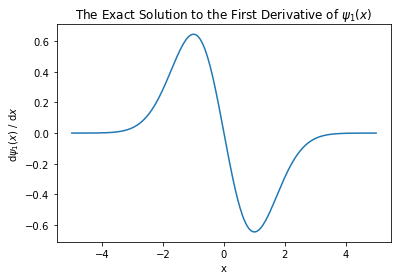

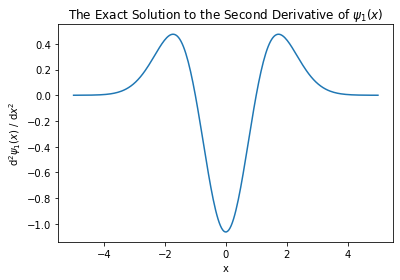

In [7]:
dpsi_t = -x * pow(4 / np.pi, 0.25) * np.exp(-x**2 / 2)
ddpsi_t = (x**2 - 1) * pow(4 / np.pi, 0.25) * np.exp(-x**2 / 2)

plt.title(r'The Exact Solution to the First Derivative of $\psi_1(x)$')
plt.xlabel('x')
plt.ylabel(r'${\rm d}\psi_1(x)\ /\ {\rm d}x$')
plt.plot(x, dpsi_t)
plt.show()

plt.title(r'The Exact Solution to the Second Derivative of $\psi_1(x)$')
plt.xlabel('x')
plt.ylabel(r'${\rm d}^2\psi_1(x)\ /\ {\rm d}x^2$')
plt.plot(x, ddpsi_t)
plt.show()

The solutions calculated by FFT have the same shapes with the exact solutions, but they have different sizes in the y axis from the exact solutions.

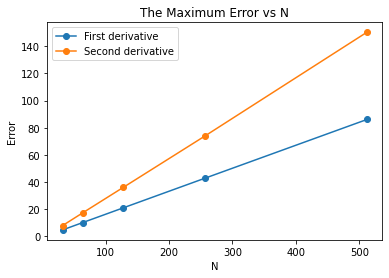

In [8]:
Ns = [32, 64, 128, 256, 512]
err = []
err2 = []
for n in Ns:
    x, dpsi = fft_diff(psi, N = n)
    x, ddpsi = fft_diff_2(psi, N = n)
    
    dpsi_t = -x * pow(4 / np.pi, 0.25) * np.exp(-x**2 / 2)
    ddpsi_t = (x**2 - 1) * pow(4 / np.pi, 0.25) * np.exp(-x**2 / 2)
    
    err.append(max(np.abs(dpsi - dpsi_t)))
    err2.append(max(np.abs(ddpsi - ddpsi_t)))

plt.title('The Maximum Error vs N')
plt.plot(Ns, err, 'o-')
plt.plot(Ns, err2, 'o-')
plt.xlabel('N')
plt.ylabel('Error')
plt.legend(['First derivative', 'Second derivative'])
plt.show()

#### (4) Extend your analysis to include the method of finite differences. What can you say about the accuracy of Fourier differentiation vs the finite-difference method?

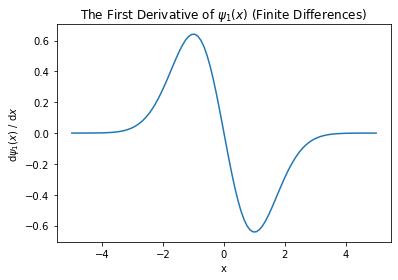

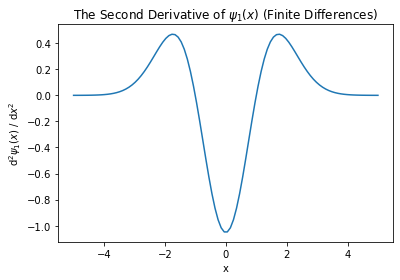

In [9]:
h = 0.1
dpsi = lambda x: (psi(x + h) - psi(x - h)) / (2*h)
ddpsi = lambda x: (dpsi(x + h) - dpsi(x - h)) / (2*h)

x = np.linspace(-5, 5, 100)

plt.title('The First Derivative of $\psi_1(x)$ (Finite Differences)')
plt.plot(x, dpsi(x))
plt.xlabel('x')
plt.ylabel(r'${\rm d}\psi_1(x)\ /\ {\rm d}x$')
plt.show()

plt.title('The Second Derivative of $\psi_1(x)$ (Finite Differences)')
plt.plot(x, ddpsi(x))
plt.xlabel('x')
plt.ylabel(r'${\rm d}^2\psi_1(x)\ /\ {\rm d}x^2$')
plt.show()

Obviously the finite-difference method is more accurate.

#### 4. Consider the following code, which uses the Euler method to compute the trajectory of a bouncing ball, assuming perfect reflection at the surface $x = 0$:

#### (1) Compile and run the program, and then plot and interpret the output. Are your numerical results physically correct? If not, can you identify a **systematic error** in the algorithm, and then fix the problem?

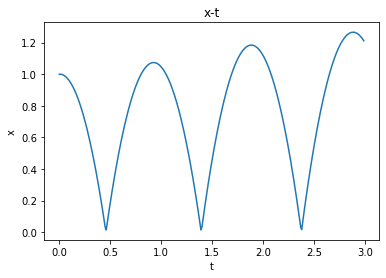

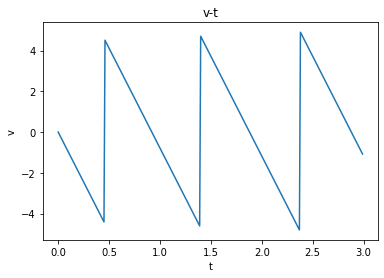

In [10]:
x = 1.0 # initial height of the ball 
v = 0 # initial velocity of the ball 
g = 9.8 # gravitational acceleration 
t = 0 # initial time 
dt = 0.01 # size of time step 
# loop for 300 timesteps 
T=np.zeros(300)
X=np.zeros(300)
V=np.zeros(300)
for i in range(300): 
    T[i]=t
    X[i]=x
    V[i]=v
    t = t + dt            
    x = x + v*dt 
    v = v - g*dt
    # reflect the motion of the ball     
    # when it hits the surface x=0     
    if x < 0:         
        x = -x         
        v = -v 
        
plt.title('x-t')
plt.plot(T,X)
plt.xlabel('t')
plt.ylabel('x')
plt.show()

plt.title('v-t')
plt.plot(T,V)
plt.xlabel('t')
plt.ylabel('v')
plt.show()

The ball jumps higher and higher, so the numerical results are physically wrong.

Systematic error: when t=0.01, x is still equai to 1.0.

Solution: change x = x + v*dt and v = v - g*dt in order.

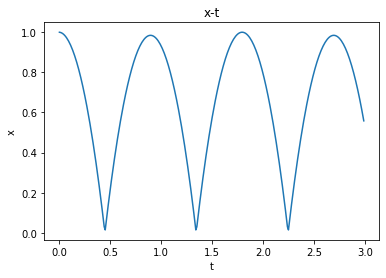

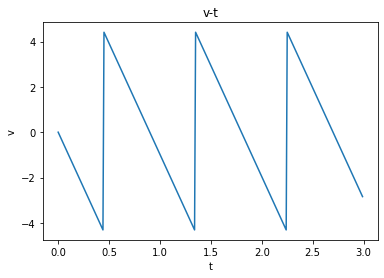

In [11]:
x = 1.0 # initial height of the ball 
v = 0 # initial velocity of the ball 
g = 9.8 # gravitational acceleration 
t = 0 # initial time 
dt = 0.01 # size of time step 
# loop for 300 timesteps 
T=np.zeros(300)
X=np.zeros(300)
V=np.zeros(300)
for i in range(300): 
    T[i]=t
    X[i]=x
    V[i]=v
    t = t + dt
    
    v = v - g*dt
    x = x + v*dt 
    
    # reflect the motion of the ball     
    # when it hits the surface x=0     
    if x < 0:         
        x = -x         
        v = -v

plt.title('x-t')
plt.plot(T,X)
plt.xlabel('t')
plt.ylabel('x')
plt.show()

plt.title('v-t')
plt.plot(T,V)
plt.xlabel('t')
plt.ylabel('v')
plt.show()

#### (2) Change the time step $dt$ in the code, but keep the same total evolution time. Explain the changes in the results.

We choose $dt$ =0.05, so there are total 60 steps.

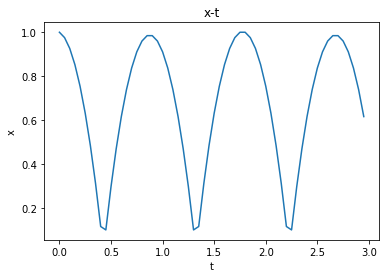

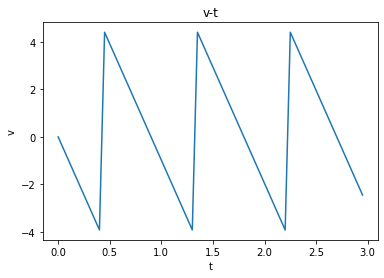

In [12]:
x = 1.0 # initial height of the ball 
v = 0 # initial velocity of the ball 
g = 9.8 # gravitational acceleration 
t = 0 # initial time 
dt = 0.05 # size of time step 
# loop for 60 timesteps 
T=np.zeros(60)
X=np.zeros(60)
V=np.zeros(60)
for i in range(60): 
    T[i]=t
    X[i]=x
    V[i]=v
    t = t + dt
    
    v = v - g*dt
    x = x + v*dt 
    
    # reflect the motion of the ball     
    # when it hits the surface x=0     
    if x < 0:         
        x = -x         
        v = -v  

plt.title('x-t')
plt.plot(T,X)
plt.xlabel('t')
plt.ylabel('x')
plt.show()

plt.title('v-t')
plt.plot(T,V)
plt.xlabel('t')
plt.ylabel('v')
plt.show()

The results show that if we change $dt$ =0.01 to $dt$ =0.05, the motion curve of the ball won't change significiant. However, in the time period of the ball bouncing on the ground, it is more accurate if we choose the smaller $dt$.

#### (3) Change the initial velocity and position of the falling ball in the code. Plot and interpret your results.

Position=5 and initial velocity=3.

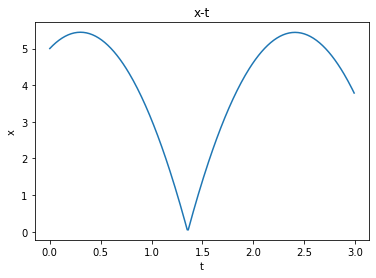

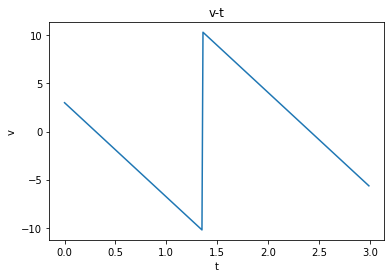

In [13]:
x = 5.0 # initial height of the ball 
v = 3.0 # initial velocity of the ball 
g = 9.8 # gravitational acceleration 
t = 0 # initial time 
dt = 0.01 # size of time step 
# loop for 300 timesteps 
T=np.zeros(300)
X=np.zeros(300)
V=np.zeros(300)
for i in range(300): 
    T[i]=t
    X[i]=x
    V[i]=v
    t = t + dt
    
    v = v - g*dt
    x = x + v*dt 
    
    # reflect the motion of the ball     
    # when it hits the surface x=0     
    if x < 0:         
        x = -x         
        v = -v  
        
plt.title('x-t')
plt.plot(T,X)
plt.xlabel('t')
plt.ylabel('x')
plt.show()

plt.title('v-t')
plt.plot(T,V)
plt.xlabel('t')
plt.ylabel('v')
plt.show()

The result agrees with the changed initial velocity and position.

#### (4) Consider inelastic collisions with the table (e.g. the ball loses 10% of its speed after every collision). Plot and interpret your results.

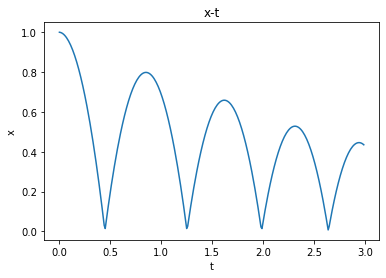

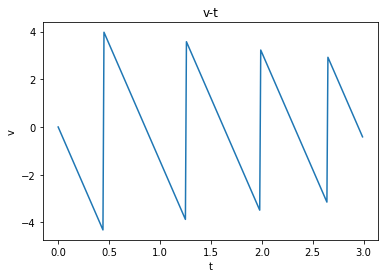

In [14]:
x = 1.0 # initial height of the ball 
v = 0 # initial velocity of the ball 
g = 9.8 # gravitational acceleration 
t = 0 # initial time 
dt = 0.01 # size of time step 
# loop for 300 timesteps 
T=np.zeros(300)
X=np.zeros(300)
V=np.zeros(300)
for i in range(300): 
    T[i]=t
    X[i]=x
    V[i]=v
    t = t + dt
    
    v = v - g*dt
    x = x + v*dt 
    
    # reflect the motion of the ball     
    # when it hits the surface x=0     
    if x < 0:         
        x = -x         
        v = -0.9*v  

plt.title('x-t')
plt.plot(T,X)
plt.xlabel('t')
plt.ylabel('x')
plt.show()

plt.title('v-t')
plt.plot(T,V)
plt.xlabel('t')
plt.ylabel('v')
plt.show()

The result shows that the height indeed becomes smaller and smaller because of inelastic collisions.

#### 5. Consider the differential equation
$$
y^\prime (x) = 1+2xy(x), y(0) = 0
$$

#### The exact solution to this differential equation is given by
$$
y(x) =\frac{1}{2}\sqrt{\pi}e^{x^2}\text{erf}(x)
$$

#### where $\text{erf}(x)$ is the error function.

#### (1) Find the numerical solution for $0 \leq x \leq 1$, using Rk2 algorithm. 

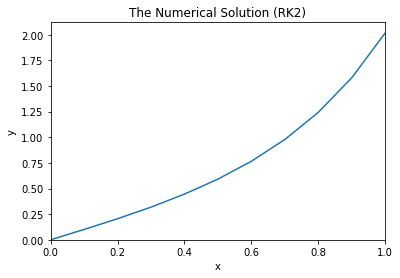

In [15]:
import numpy as np
from scipy.special import erf
import matplotlib.pyplot as plt
%matplotlib inline

def RK2(f, x0, y0, x, h):
    k1 = lambda x, y: f(x, y)
    k2 = lambda x, y: f(x + 3/4 * h, y + 3/4 * k1(x, y) * h)
    xs = np.arange(x0, x + h, h)
    ys = [y0]
    for n in range(len(xs)-1):
        ys.append(ys[n] + 1/3 * h * (k1(xs[n], ys[n]) + 2 * k2(xs[n], ys[n])))
    return xs, ys

f = lambda x, y: 1 + 2*x*y

# the numerical solution using RK2 algorithm
x, y = RK2(f, 0, 0, 1, 0.1)  # set h=0.1

plt.plot(x, y)
plt.title('The Numerical Solution (RK2)')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(0, 1)
plt.ylim(0, )
plt.show()

#### (2) Calculate the numeric error in your solution for various values of $\Delta x$, and plot how the error scales with $\Delta x$.

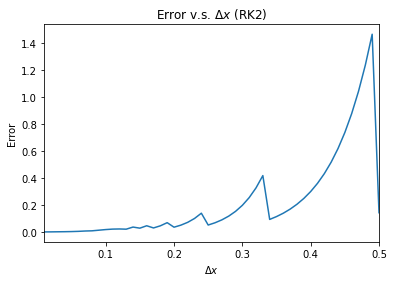

In [16]:
def err_RK2(h):
    x, y = RK2(f, 0, 0, 1, h)
    yt = 0.5 * np.sqrt(np.pi) * np.exp(x**2) * erf(x)  # the true solution
    return y[-1] - yt[-1]

hs = np.arange(0.01, 0.51, 0.01)  # Δ𝑥 range: [0.01, 0.5]
errs_RK2 = np.abs([err_RK2(h) for h in hs])

plt.plot(hs, errs_RK2)
plt.title('Error v.s. $\Delta x$ (RK2)')
plt.xlabel('$\Delta x$')
plt.ylabel('Error')
plt.xlim(0.01, 0.5)
plt.show()

#### (i) How does this compare to the Euler method?

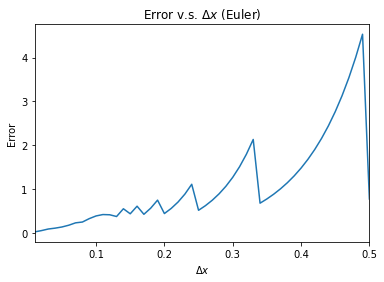

In [17]:
def Euler(f, x0, y0, x, h):
    xs = np.arange(x0, x + h, h)
    ys = [y0]
    for n in range(len(xs)-1):
        ys.append(ys[n] + h * f(xs[n], ys[n]))
    return xs, ys

def err_Euler(h):
    x, y = Euler(f, 0, 0, 1, h)
    yt = 0.5 * np.sqrt(np.pi) * np.exp(x**2) * erf(x)
    return y[-1] - yt[-1]

hs = np.arange(0.01, 0.51, 0.01)  # Δ𝑥 range: [0.01, 0.5]
errs_Euler = np.abs([err_Euler(h) for h in hs])

plt.plot(hs, errs_Euler)
plt.title('Error v.s. $\Delta x$ (Euler)')
plt.xlabel('$\Delta x$')
plt.ylabel('Error')
plt.xlim(0.01, 0.5)
plt.show()

The RK2 algorithm produces much less error than the Euler method.

#### (ii) How does this compare to the <font color=green>leap-frog</font> method?

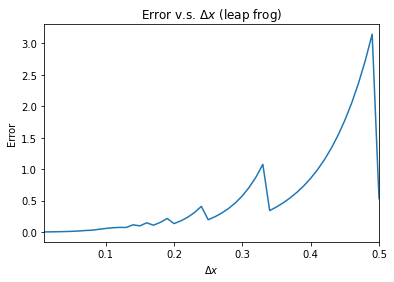

In [18]:
def leap_frog(f, x0, y0, x, h):
    xs = np.arange(x0, x + h, h)
    ys = [y0, y0 + h * f(x0, y0)]
    for n in range(1, len(xs)-1):
        ys.append(ys[n-1] + 2 * h * f(xs[n], ys[n]))
    return xs, ys

def err_leap(h):
    x, y = leap_frog(f, 0, 0, 1, h)
    yt = 0.5 * np.sqrt(np.pi) * np.exp(x**2) * erf(x)
    return y[-1] - yt[-1]

hs = np.arange(0.01, 0.51, 0.01)  # Δ𝑥 range: [0.01, 0.5]
errs_leap = np.abs([err_leap(h) for h in hs])

plt.plot(hs, errs_leap)
plt.title('Error v.s. $\Delta x$ (leap frog)')
plt.xlabel('$\Delta x$')
plt.ylabel('Error')
plt.xlim(0.01, 0.5)
plt.show()

The RK2 algorithm produces much less error than the leap-frog method, too.

#### (3) Now solve the differential equation using RK4. Analyse your results. How does the error scaling compare to RK2 method?

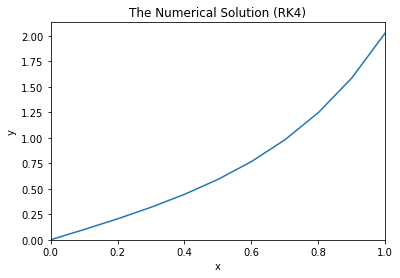

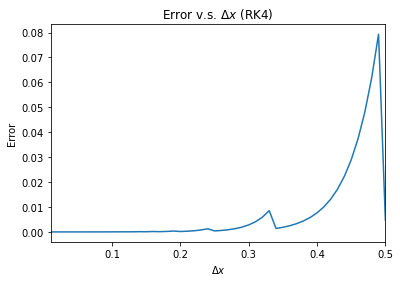

In [19]:
def RK4(f, x0, y0, x, h):
    k1 = lambda x, y: f(x, y)
    k2 = lambda x, y: f(x + 0.5 * h, y + 0.5 * k1(x, y) * h)
    k3 = lambda x, y: f(x + 0.5 * h, y + 0.5 * k2(x, y) * h)
    k4 = lambda x, y: f(x + h, y + k3(x, y) * h)
    xs = np.arange(x0, x + h, h)
    ys = [y0]
    for n in range(len(xs)-1):
        ys.append(ys[n] + h/6 * (k1(xs[n], ys[n]) + 2*k2(xs[n], ys[n]) + 2*k3(xs[n], ys[n]) + k4(xs[n], ys[n])))
    return xs, ys

f = lambda x, y: 1 + 2*x*y

x, y = RK4(f, 0, 0, 1, 0.1)  # the numerical solution using RK2 algorithm

plt.plot(x, y)
plt.title('The Numerical Solution (RK4)')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(0, 1)
plt.ylim(0, )
plt.show()

def err_RK4(h):
    x, y = RK4(f, 0, 0, 1, h)
    yt = 0.5 * np.sqrt(np.pi) * np.exp(x**2) * erf(x)
    return y[-1] - yt[-1]

hs = np.arange(0.01, 0.51, 0.01)
errs_RK4 = np.abs([err_RK4(h) for h in hs])

plt.plot(hs, errs_RK4)
plt.title('Error v.s. $\Delta x$ (RK4)')
plt.xlabel('$\Delta x$')
plt.ylabel('Error')
plt.xlim(0.01, 0.5)
plt.show()

The RK4 algorithm is more precise than the RK2 algorithm.

#### 6. Use `scipy.integrate.odeint` to solve the following set of nonlinear ODEs.
$$\begin{aligned}
\frac{dx}{dt}= a(y - x),\;\frac{dy}{dt}= (c - a)x - xz + cy, \; \frac{dz}{dt}= xy - bz
\end{aligned}$$
#### For the initial conditions, use $x_0 = -10$, $y_0 = 0$, $z_0 = 35$. Setting the initial parameters to $a = 40$, $b = 5$, $c = 35$ gives chaotic solutions like those shown below. Setting $b = 10$ while keeping $a = 40$ and $c = 35$ yields periodic solutions. Take care to choose a small enough     time step (but not too small!).

(1) a=40, b=5, c=35

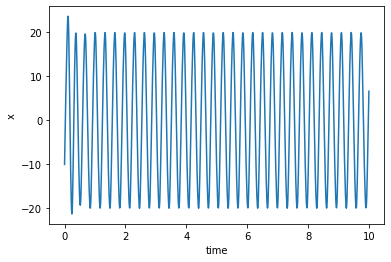

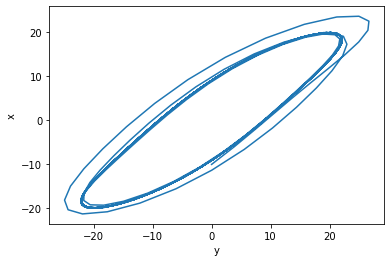

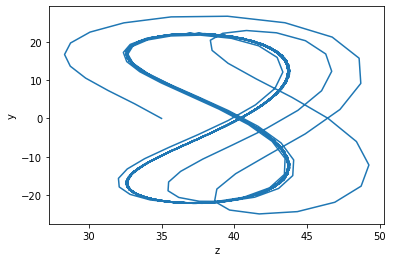

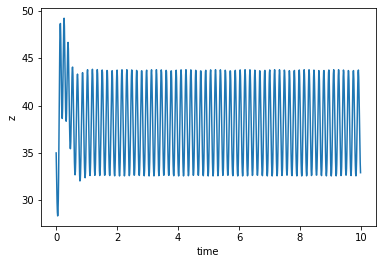

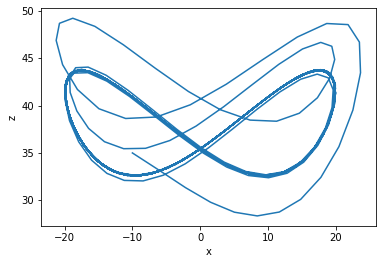

In [20]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
%matplotlib inline

def pend(Point,t,sets):    
    a,b,c = sets    
    x,y,z = Point    
    return np.array([a*(y-x),(c-a)*x-x*z+c*y,x*y-b*z]) 

t = np.arange(0,10,0.01)
sol= odeint(pend,(-10.,0.,35.),t,args = ([40.,5.,35.],))

plt.plot(t,sol[:,0])
plt.xlabel('time')
plt.ylabel('x')
plt.show()

plt.plot(sol[:,1],sol[:,0])
plt.xlabel('y')
plt.ylabel('x')
plt.show()

plt.plot(sol[:,2],sol[:,1])
plt.xlabel('z')
plt.ylabel('y')
plt.show()

plt.plot(t,sol[:,2])
plt.xlabel('time')
plt.ylabel('z')
plt.show()

plt.plot(sol[:,0],sol[:,2])
plt.xlabel('x')
plt.ylabel('z')
plt.show()

(2) a=40, b=10, c=35

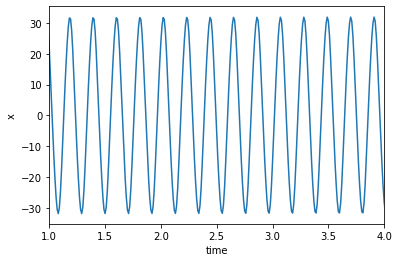

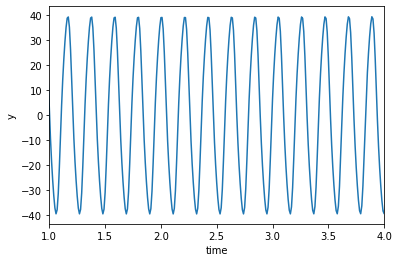

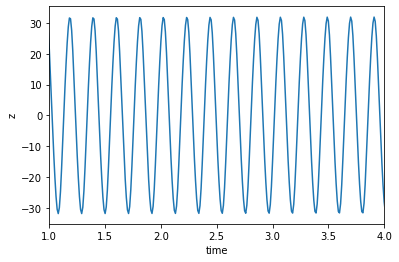

In [21]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
%matplotlib inline

def pend(Point,t,sets):    
    a,b,c = sets    
    x,y,z = Point    
    return np.array([a*(y-x),(c-a)*x-x*z+c*y,x*y-b*z]) 

t = np.arange(0,10,0.01)
sol= odeint(pend,(-10.,0.,35.),t,args = ([40.,10.,35.],))

plt.plot(t,sol[:,0])
plt.xlabel('time')
plt.ylabel('x')
plt.xlim(1,4)
plt.show()

plt.plot(t,sol[:,1])
plt.xlabel('time')
plt.ylabel('y')
plt.xlim(1,4)
plt.show()

plt.plot(t,sol[:,0])
plt.xlabel('time')
plt.ylabel('z')
plt.xlim(1,4)
plt.show()